Bu uygulamada kullanılan model, derin öğrenme tabanlı basit bir yapay sinir ağıdır. TensorFlow ve Keras kütüphanelerini kullanarak oluşturulan bu model, MNIST veri setinde el yazısı rakamlarını tanımak için kullanılır.

MNIST veri seti, 0'dan 9'a kadar olan el yazısı rakamlarından oluşan 70.000 adet görüntüyü içerir. Bu görüntüler 28x28 piksel boyutlarında ve gri tonlamalıdır.

**Modelin mimarisi şu şekildedir:**

Flatten Katmanı: Giriş katmanı olarak kullanılır ve 28x28 boyutundaki giriş görüntüsünü tek boyutlu bir vektöre dönüştürür (28 * 28 = 784 piksel). Bu katman, modelin giriş verilerini işlemesi için düzleştirilmiş veri sağlar.

**Dense Katmanı (128 nöron):** İlk gizli katman, 128 nörona sahip ve ReLU (Rectified Linear Unit) aktivasyon fonksiyonunu kullanır. ReLU, modelin doğrusal olmayan ilişkileri öğrenmesine yardımcı olur.

**Dense Katmanı (64 nöron):** İkinci gizli katman, 64 nörona sahip ve yine ReLU aktivasyon fonksiyonunu kullanır.

**Dense Katmanı (10 nöron):** Çıkış katmanı olarak kullanılır ve 10 nörona sahip olup, softmax aktivasyon fonksiyonunu kullanır. Bu katman, modelin her bir sınıf (0-9) için olasılık dağılımını üretmesini sağlar.

Model, 'adam' optimize edici, 'categorical_crossentropy' kayıp fonksiyonu ve 'accuracy' metriği kullanarak derlenir. Eğitim sırasında, modelin performansını değerlendirmek için doğrulama veri seti olarak eğitim veri setinin %20'si kullanılır. Model, toplamda 10 epoch boyunca eğitilir ve her seferinde 32 örneklik mini-batch'ler halinde güncellenir.

Eğitimin ardından, modelin performansı test veri setinde değerlendirilir ve hata matrisi (confusion matrix) çizdirilir. Hata matrisi, modelin gerçek etiketler ile tahminler arasındaki ilişkiyi gösterir.

Kütüphanelerin içe aktarılması


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Veri setini yükleyin ve ön işlemleri gerç


In [ ]:
# MNIST veri setini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veri normalleştirme
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


* Etiketleri one-hot vektörlerine dönüştürme

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Derin öğrenme modelinin oluşturulması:

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


Modelin derlenmesi ve eğitilmesi


In [ ]:
import matplotlib.pyplot as plt
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2758 - accuracy: 0.9182 - val_loss: 0.1352 - val_accuracy: 0.9611
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1159 - accuracy: 0.9658 - val_loss: 0.1096 - val_accuracy: 0.9678
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.1048 - val_accuracy: 0.9695
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.0988 - val_accuracy: 0.9708
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0837 - val_accuracy: 0.9769
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.1026 - val_accuracy: 0.9720
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0968 - val_accuracy:

* Eğitim sürecinin görselleştirilmesi

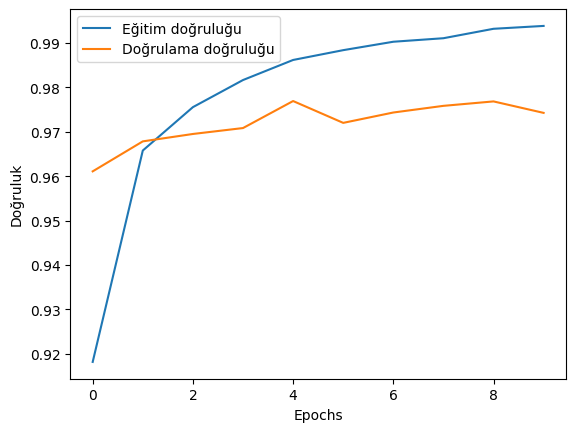

In [ ]:
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

Modelin performansının değerlendirilmesi

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test veri seti üzerindeki doğruluk: {:.2f}%".format(test_accuracy * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9770
Test veri seti üzerindeki doğruluk: 97.70%


In [ ]:
import numpy as np
from itertools import product

from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Gerçek ')
    plt.xlabel('Tahmin ')

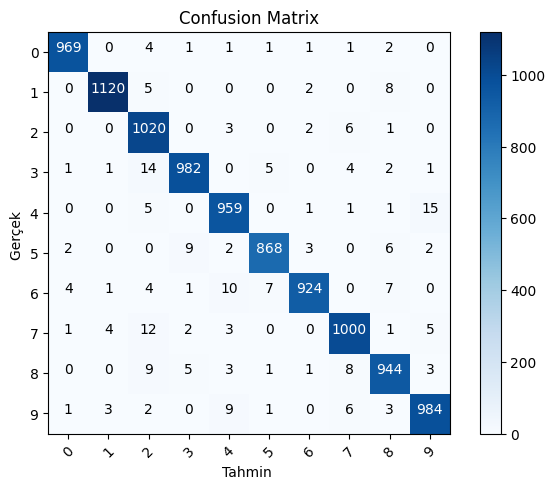

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plot_confusion_matrix(cm, classes=range(10))
plt.show()